## Enunciado

>Considere el proyecto cuya información se adjunta.
> 1. Dibuje el diagrama Pert y determine el camino crítico.
> 2. Indique el coste de realización para duración PERT
> 3. A la vista de la planificación dada, su jefe le dice que el proyeco tiene que ejecutarse en 12 o menos periodos. ¿Con qué probabilidad estima que se verán cumplidos los deseos de su jefe?
> 4. Reduzca la duración del proyecto dos unidades de tiempo con el menor incremento de coste posible.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')
pmule_path = r'/content/gdrive/MyDrive/COMPARTIDOS/COMPARTIDO_AREA/DOCENCIA/Direccion_de_Proyectos/pmule/compartido_publico_alumnos/'

import sys
sys.path.insert(1, pmule_path + "src")
!source {pmule_path}venv/bin/activate
!apt install libgraphviz-dev
!python -m pip install pygraphviz "pandas[excel]==2.2.2"

Mounted at /content/gdrive/
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 49 not upgraded.
Need to get 2,434 kB of archives.
After this operation, 7,681 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2.1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2.1 [2,038 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgail18 amd64 2.24.33-2ubuntu2.1 [15.9 k

In [2]:
# Alargamos el ancho de las celdas al 100%
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import pandas as pd
import numpy as np

datos_enunciado = pd.DataFrame([
#  actividad, precedentes, b, m, a, coste_duracion_pert, coste_duracion_tope, duracion_tope
     ('A', '---  ',   6,  2.5, 2, 1600, 1800, 2),
     ('B', '---  ',   2,    2, 2, 2900, 2900, 1),
     ('C', '---  ',   1,    1, 1,  600,  600, 1),
     ('D', '---  ',   1,    1, 1,  600,  600, 1),
     ('E', 'A,B  ',  12,    5, 4, 1600, 2200, 2),
     ('F', 'A,B  ',  12,  2.5, 2, 2000, 2200, 1),
     ('G', 'B,C  ',   6, 1.25, 1,  600,  700, 1),
     ('H', 'B,C  ',  20,   13, 6, 3500, 4900, 3),
     ('I', 'D    ',  30,   12, 6, 3500, 4300, 4),
     ('J', 'E,M  ',   4,    4, 4, 1500, 1500, 2),
     ('K', 'F    ',   7,    7, 7, 2000, 2000, 3),
     ('L', 'J,K,G',   1,    1, 1, 1000, 1000, 1),
     ('M', 'F    ',   3,    3, 3,  500,  500, 1),

] ,columns=['activity', 'predecessors', 'b', 'm', 'a',
            'cost_pert_duration', 'cost_cap_duration', 'cap_duration']).set_index('activity')

datos_enunciado

,predecessors,b,m,a,cost_pert_duration,cost_cap_duration,cap_duration
activity,,,,,,,
A,---,6,2.50,2,1600,1800,2
B,---,2,2.00,2,2900,2900,1
C,---,1,1.00,1,600,600,1
D,---,1,1.00,1,600,600,1
E,"A,B",12,5.00,4,1600,2200,2
F,"A,B",12,2.50,2,2000,2200,1
G,"B,C",6,1.25,1,600,700,1
H,"B,C",20,13.00,6,3500,4900,3
I,D,30,12.00,6,3500,4300,4


## Solución
### Apartado 1

> Dibuje el diagrama Pert y determine el camino crítico.

En pmule (project management at ULE) está el código que utilizamos para calcular los valores del PERT.

In [3]:
from pmule import PredecessorTable, ProjectGraph

In [4]:
datos_proyecto = datos_enunciado.copy()
prelaciones = PredecessorTable.from_dataframe_of_strings(datos_proyecto, activity='activity', predecessor='predecessors')
prelaciones.display_immediate_linkage_matrix()

,A,B,C,D,E,F,G,H,I,J,K,L,M
activities,,,,,,,,,,,,,
A,,,,,,,,,,,,,
B,,,,,,,,,,,,,
C,,,,,,,,,,,,,
D,,,,,,,,,,,,,
E,True,True,,,,,,,,,,,
F,True,True,,,,,,,,,,,
G,,True,True,,,,,,,,,,
H,,True,True,,,,,,,,,,
I,,,,True,,,,,,,,,


La clase PertGraph permite visualizar el grafo PERT, el diagrama de Gantt así como realizar el cálculo de tiempos tempranos, tardíos y de las holguras totales.

##### Precálculo de variables de interés

A partir de los datos del enunciado podemos calcular la duración media, la desviación típica y el coste unitario de reducción que utilizaremos para contestar las preguntas realizadas.

In [5]:
datos_proyecto['duration'] = datos_proyecto.eval('(b + 4*m +a)/6')
datos_proyecto['standard_deviation'] = datos_proyecto.eval('(b -a)/6')
datos_proyecto['ucr'] = datos_proyecto.eval('(cost_cap_duration - cost_pert_duration)/(duration - cap_duration)')
datos_proyecto[['b', 'm', 'a', 'duration', 'standard_deviation', 'ucr']]

,b,m,a,duration,standard_deviation,ucr
activity,,,,,,
A,6,2.50,2,3.0,0.666667,200.000000
B,2,2.00,2,2.0,0.000000,0.000000
C,1,1.00,1,1.0,0.000000,NaN
D,1,1.00,1,1.0,0.000000,NaN
E,12,5.00,4,6.0,1.333333,150.000000
F,12,2.50,2,4.0,1.666667,66.666667
G,6,1.25,1,2.0,0.833333,100.000000
H,20,13.00,6,13.0,2.333333,140.000000
I,30,12.00,6,14.0,4.000000,80.000000


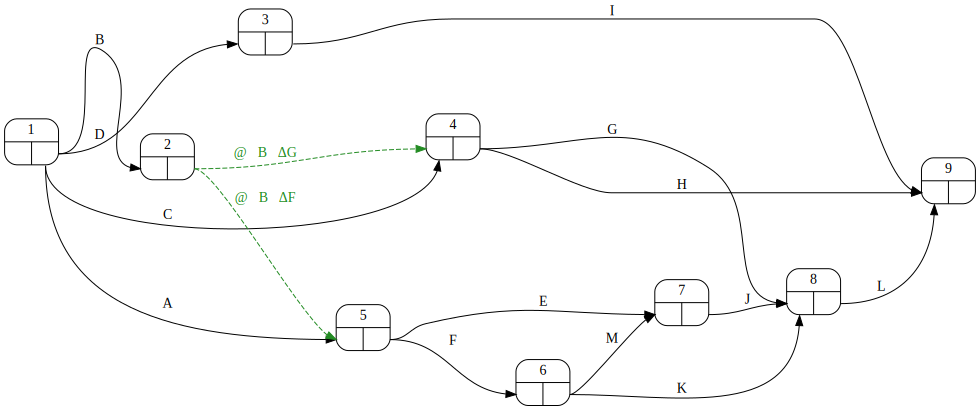

In [6]:
proyecto = prelaciones.create_project()
proyecto.pert(ranksep=1, nodesep=0.6)

##### Grafo PERT con numeración de nodos

##### Matriz de Zaderenko

In [7]:
proyecto.zaderenko(datos_proyecto['duration'])

,1,2,3,4,5,6,7,8,9,early
1,,2.0,1.0,1.0,3.0,,,,,0.0
2,,,,0.0,0.0,,,,,2.0
3,,,,,,,,,14.0,1.0
4,,,,,,,,2.0,13.0,2.0
5,,,,,,4.0,6.0,,,3.0
6,,,,,,,3.0,7.0,,7.0
7,,,,,,,,4.0,,10.0
8,,,,,,,,,1.0,14.0
9,,,,,,,,,,15.0
late,0.0,2.0,1.0,2.0,3.0,7.0,10.0,14.0,15.0,


In [8]:
resultados_pert = proyecto.calculate_pert(datos_proyecto['duration'])
resultados_pert['nodes']

,early,late
1,0,0
2,2,2
3,1,1
4,2,2
5,3,3
6,7,7
7,10,10
8,14,14
9,15,15


##### Holguras

In [9]:
resultados_pert['activities']

,H_total
@∇B⤑ΔF,1
@∇B⤑ΔG,0
A,0
B,0
C,1
D,0
E,1
F,0
G,10
H,0


###### Camino crítico

In [10]:
camino_critico = proyecto.critical_path(datos_proyecto['duration'])
camino_critico

{'Route_2': ['B', '@∇B⤑ΔG', 'H'],
 'Route_6': ['D', 'I'],
 'Route_10': ['A', 'F', 'K', 'L'],
 'Route_11': ['A', 'F', 'M', 'J', 'L']}

##### Grafo PERT con indicación de tiempos

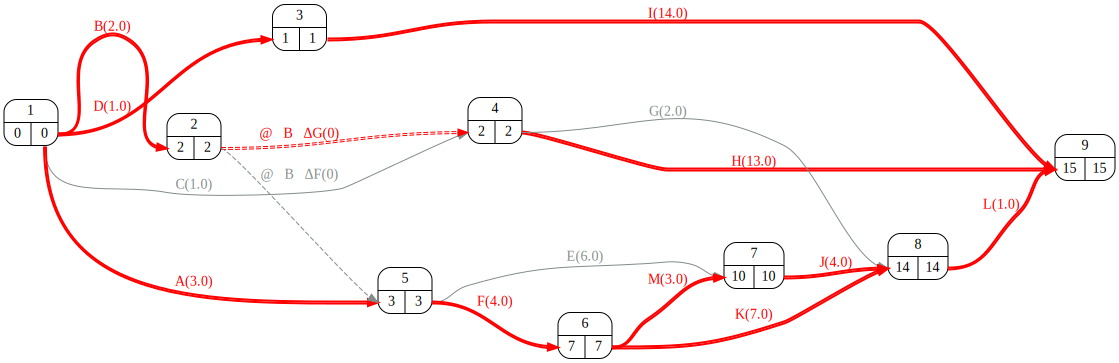

In [11]:
proyecto.pert(durations=datos_proyecto['duration'], ranksep=1)

### Apartado 2
> 2. Indique el coste de realización para duración PERT

Para responder este apartado tan sólo es necesario sumar los costes indicados en la columna coste_duracion_pert.

In [12]:
datos_proyecto['cost_pert_duration']

,cost_pert_duration
activity,
A,1600
B,2900
C,600
D,600
E,1600
F,2000
G,600
H,3500
I,3500


In [13]:
datos_proyecto['cost_pert_duration'].sum()

21900

### Apartado 3
> A la vista de la planificación dada, su jefe le dice que el proyeco tiene que ejecutarse en 12 o menos periodos. ¿Con qué probabilidad estima que se verán cumplidos los deseos de su jefe?


##### Duración media del proyecto

La duración media del proyecto ya la tenemos calculada:

In [14]:
duracion_media_proyecto = proyecto.duration(datos_proyecto['duration'])
duracion_media_proyecto

15

##### Desviación típica del proyecto

Calculamos la varianza para cada rama:

In [15]:
datos_proyecto['variance'] = datos_proyecto.eval('standard_deviation ** 2')
desviacion_proyecto = proyecto.standard_deviation(durations=datos_proyecto['duration'],
                                                  variances=datos_proyecto['variance'])
desviacion_proyecto

Variance path: Route_2 : 5.444444444444443
Variance path: Route_6 : 16.0
Variance path: Route_10 : 3.2222222222222214
Variance path: Route_11 : 3.2222222222222214
Project duration variance: 16.0
Project duration standard deviation: 4.0


4.0

##### Cálculo de la probabilidad

Una vez caracterizada la distribución normal con la que aproximamos la duración del proyecto, podemos hacer el cálculo de la probabilidad:

In [16]:
import scipy
from scipy.stats import norm

probabilidad_de_terminar_antes_de_12 = norm.cdf(12, loc=duracion_media_proyecto, scale=desviacion_proyecto)
probabilidad_de_terminar_antes_de_12 * 100

22.66273523768682

### Apartado 4.

> Reduzca la duración del proyecto dos unidades de tiempo con el menor incremento de coste posible.


Se aborda la solución de este apartado mediante la técnica de reducción de la duración del proyecto con mínimo coste.

In [17]:
ackoff, best_option, durations, available = proyecto.ackoff(durations=datos_proyecto['duration'],
                                                            min_durations=datos_proyecto['cap_duration'],
                                                            costs=datos_proyecto['ucr'],
                                                            reduction=2)
ackoff

D shape (13,)
Path matrix shape (11, 13)


Step: 0,	 Best option: ['B', 'J', 'K', 'I'], 	 Cost: 80.0, 	 Critical paths: ['Route_2', 'Route_6', 'Route_10', 'Route_11']
Step: 1,	 Best option: ['J', 'H', 'K', 'I'], 	 Cost: 220.0, 	 Critical paths: ['Route_2', 'Route_6', 'Route_8', 'Route_10', 'Route_11']





,A,B,C,D,E,F,G,H,I,J,K,L,M,0,1,2
Route_1,,0.0,,,,,100.0,,,,,,,5.0,4.0,4.0
Route_2,,0.0,,,,,,140.0,,,,,,15.0,14.0,13.0
Route_3,,0.0,,,150.0,,,,,0.0,,,,13.0,11.0,10.0
Route_4,,0.0,,,,66.7,,,,,0.0,,,14.0,12.0,11.0
Route_5,,0.0,,,,66.7,,,,0.0,,,0.0,14.0,12.0,11.0
Route_6,,,,,,,,,80.0,,,,,15.0,14.0,13.0
Route_7,,,,,,,100.0,,,,,,,4.0,4.0,4.0
Route_8,,,,,,,,140.0,,,,,,14.0,14.0,13.0
Route_9,200.0,,,,150.0,,,,,0.0,,,,14.0,13.0,12.0
Route_10,200.0,,,,,66.7,,,,,0.0,,,15.0,14.0,13.0
